In [1]:
# import Python packages
import pandas as pd
import numpy as np
import biom
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize, TwoSlopeNorm
import seaborn as sns
import scipy.stats as ss

In [2]:
# read in biom table
biom_tbl = biom.load_table("../data/table.filt.zebra10.overlap.biom")
biom_tbl = biom_tbl.to_dataframe().T
biom_tbl.head()

,G001314975,G000020225,G000020205,G000299455,G001953785,G000403215,G000205025,G001945605,G000403315,G000403435,...,G000497205,G000434095,G000349565,G000023865,G000478885,G000286395,G001611135,G000191545,G000009825,G000753855
14365.Con.feces.13,1818190.0,77908.0,5.0,0.0,26284.0,2.0,27983.0,0.0,3.0,2.0,...,4.0,222.0,16.0,0.0,0.0,0.0,4.0,5.0,2.0,2.0
14365.Con.feces.12,1940129.0,144431.0,0.0,2.0,4266.0,4156.0,37170.0,6.0,4090.0,194.0,...,0.0,240.0,18.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
14365.Con.feces.10,881363.0,13776.0,2.0,168.0,8.0,95824.0,2167.0,0.0,62603.0,39926.0,...,149.0,115.0,53.0,35.0,522.0,26.0,86.0,44.0,17.0,4.0
14365.Con.feces.11,1081167.0,191570.0,159.0,2.0,2300.0,12412.0,80657.0,0.0,18284.0,33451.0,...,3.0,142.0,29.0,4.0,0.0,0.0,9.0,3.0,9.0,7.0
14365.Con.feces.14,3061899.0,33815.0,13.0,2.0,35286.0,901.0,66397.0,346.0,881.0,4837.0,...,5.0,354.0,16.0,11.0,1.0,0.0,22.0,0.0,12.0,1.0


In [3]:
# read in taxonomic differential abundance results
diff = pd.read_table("../data/taxonomic_diff_ab.tsv", sep="\t", index_col=0)
col_map = {
    "C(mouse_type, Treatment('control'))[T.vancomycin]": "beta_vancomycin",
    "C(mouse_type, Treatment('control'))[T.wound]": "beta_wound"
}
diff = diff.rename(columns=col_map)
diff = diff.sort_values(by="beta_wound", ascending=True)
print(diff.shape)
diff.head()

(34, 3)


,Intercept,beta_vancomycin,beta_wound
featureid,,,
G000020205,3.572102,2.608911,-8.858723
G000299455,3.130091,2.368331,-7.587422
G000513215,1.139338,1.516479,-7.038276
G000286395,-2.879282,-0.158346,-3.012602
G000706685,-0.418808,1.499883,-1.835451


In [4]:
# read in metadata
md = pd.read_table("../data/metadata.filt.tsv", sep="\t", index_col=0)
md.head()

,anonymized_name,collection_timestamp,description,dna_extracted,elevation,empo_1,empo_2,empo_3,env_biome,env_feature,...,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,tube_id,mouse_type,sampling_depth
sample_name,,,,,,,,,,,,,,,,,,,,,
14365.Wound.feces.31,WC31,2021-11-23 09:59:59.995000,mouse fecal sampleWound.feces.31,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,63,wound,3570735.0
14365.Vanco.feces.27,VC27,2021-11-23 09:59:59.995000,mouse fecal sampleVanco.feces.27,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,91,vancomycin,13812869.0
14365.Wound.feces.3,WC3,2021-11-23 09:59:59.995000,mouse fecal sampleWound.feces.3,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,35,wound,1094969.0
14365.Vanco.feces.9,VC9,2021-11-23 09:59:59.995000,mouse fecal sampleVanco.feces.9,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,73,vancomycin,123649.0
14365.Con.feces.4,CC4,2021-11-23 09:59:59.995000,mouse fecal sampleCon.feces.4,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,4,control,172350.0


In [5]:
# read in taxonomy table
tax = pd.read_table("../reference/taxonomy_table.tsv", sep="\t", index_col=0).loc[diff.index]
tax = tax["Taxon"].str.split(";", expand=True)
tax.columns = list("kpcofgst")
tax.head()

,k,p,c,o,f,g,s,t
featureid,,,,,,,,
G000020205,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Ralstonia,s__Ralstonia pickettii,t__
G000299455,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,t__
G000513215,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Yersiniaceae,g__Serratia,s__Serratia marcescens,t__Serratia marcescens subsp. marcescens
G000286395,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,s__Staphylococcus lentus,t__
G000706685,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,s__Staphylococcus xylosus,t__


In [6]:
# create color palette
mouse_types = ["control", "vancomycin", "wound"]
palette = dict(zip(
    mouse_types,
    sns.color_palette("colorblind", len(mouse_types))
))

# get taxonomy labels
tax_list = []
for i in list(tax['s']):
    i = i.replace("s__", "")
    tax_list.append(i)

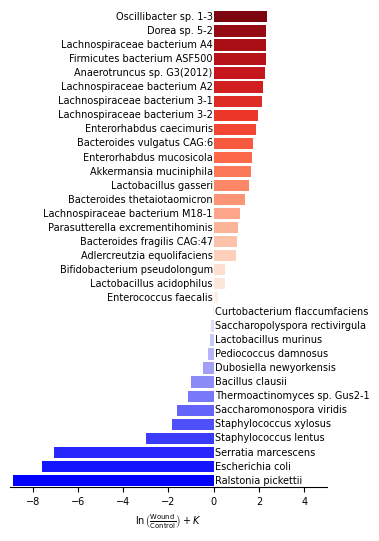

In [7]:
# create taxonomic differential abundance plot
mm = 1/25.4
fig, ax = plt.subplots(1, 1, figsize=(100*mm, 140*mm))

norm = TwoSlopeNorm(
    vmin=diff["beta_wound"].min(),
    vcenter=0,
    vmax=diff["beta_wound"].max()
)

colors = sns.light_palette("Blue", 13)[::-1] + sns.color_palette("Reds", 21)

y = np.arange(diff.shape[0])
ax.barh(
    y=y,
    width=diff["beta_wound"],
    color=colors,
    linewidth=0.5
)

n = 0
for i, (gotu, row) in enumerate(diff.iterrows()):
    text_align = "left" if row["beta_wound"] < 0 else "right"
    sign = 1 if row["beta_wound"] < 0 else -1
    ax.text(
        y=i,
        x=sign*0.05,
        # s=tax["s"].replace("s__", ""),
        #s = list(tax['s']).replace("s__", ""),
        s = tax_list[n],
        ha=text_align,
        va="center",
        fontsize=7,
    )
    n = n + 1 
    
ax.yaxis.set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([-9, 5])
ax.set_ylim([-0.5, diff.shape[0] - 0.5])
plt.xticks(fontsize=7)

ax.set_xlabel(r"$\ln\left(\frac{\mathrm{Wound}}{\mathrm{Control}}\right) + K$", fontsize = 7)
plt.tight_layout()
plt.savefig("../plots/Fig_3E_taxonomic_diff_ab.png", dpi=600)
plt.show()